In [1]:
2 + 2

4

In [2]:
precio_ayer = 115      # nombre a cada dato
precio_hoy = 120
rentabilidad = (precio_hoy - precio_ayer) / precio_ayer
rentabilidad, f"{rentabilidad:.2%}"


(0.043478260869565216, '4.35%')

In [3]:
# Una serie ficticia de 5 días (cierres)
precios = [100, 102, 101, 105, 103]
precios  # verás la lista tal cual


[100, 102, 101, 105, 103]

In [4]:
# r_t = (p_t - p_{t-1}) / p_{t-1}
retornos = []                      # empezamos con una lista vacía
for i in range(1, len(precios)):   # del segundo dato al último
    r = (precios[i] - precios[i-1]) / precios[i-1]
    retornos.append(r)

retornos, [f"{r:.2%}" for r in retornos]  # crudo y en formato %


([0.02, -0.00980392156862745, 0.039603960396039604, -0.01904761904761905],
 ['2.00%', '-0.98%', '3.96%', '-1.90%'])

In [5]:
# 1) Importo un módulo estándar de Python con funciones estadísticas
import statistics

# 2) Calculo la media de los retornos diarios
media_diaria = statistics.mean(retornos)

# 3) Calculo la desviación estándar "muestral" (usa n-1 en el denominador),
#    que es lo habitual cuando estimamos a partir de pocos datos.
vol_diaria = statistics.stdev(retornos)

# 4) Muestro ambos: crudo y formateado en porcentaje con dos decimales
media_diaria, vol_diaria, f"{media_diaria:.2%}", f"{vol_diaria:.2%}"


(0.007688104944948276, 0.02702452292505173, '0.77%', '2.70%')

In [6]:
# Señal/ruido de tus 4 retornos (aprendizaje, no decisión)
sharpe_diario = media_diaria / vol_diaria if vol_diaria != 0 else float('nan')
sharpe_anual = sharpe_diario * (252 ** 0.5)

sharpe_diario, sharpe_anual


(0.28448624111774434, 4.516079072502656)

In [7]:
precios = [100, 102, 101, 105, 103]
retornos = []
for i in range(1, len(precios)):
    r = (precios[i] - precios[i-1]) / precios[i-1]
    retornos.append(r)

In [8]:
# Tipo libre de riesgo aproximado: 3% anual -> diario ~ 0.03/252
rf_diario = 0.03 / 252

# Excesos de retorno diarios
excesos = [r - rf_diario for r in retornos]

import statistics
media_xs = statistics.mean(excesos)
vol_xs   = statistics.stdev(excesos)

sharpe_d_xs = media_xs / vol_xs if vol_xs != 0 else float('nan')
sharpe_a_xs = sharpe_d_xs * (252 ** 0.5)

(media_xs, vol_xs, f"{media_xs:.2%}", f"{vol_xs:.2%}", sharpe_d_xs, sharpe_a_xs)


(0.007569057325900658,
 0.027024522925051732,
 '0.76%',
 '2.70%',
 0.2800810710661664,
 4.446149165866108)

In [2]:
precios = [100, 102, 101, 105, 103]
retornos = []
for i in range(1, len(precios)):
    r = (precios[i] - precios[i-1]) / precios[i-1]
    retornos.append(r)


In [3]:
# Tipo libre de riesgo diario (suponiendo 3% anual)
rf_diario = 0.03 / 252

# Exceso de retorno: r_t - rf_t
excesos = [r - rf_diario for r in retornos]

# Mostrar en % y la diferencia entre ambos (debe rondar -rf)
ret_pct = [f"{r:.2%}" for r in retornos]
exc_pct = [f"{x:.2%}" for x in excesos]
dif_pct = [f"{(x - r):.4%}" for r, x in zip(retornos, excesos)]

ret_pct, exc_pct, dif_pct  # mira las tres listas

(['2.00%', '-0.98%', '3.96%', '-1.90%'],
 ['1.99%', '-0.99%', '3.95%', '-1.92%'],
 ['-0.0119%', '-0.0119%', '-0.0119%', '-0.0119%'])

Matplotlib is building the font cache; this may take a moment.


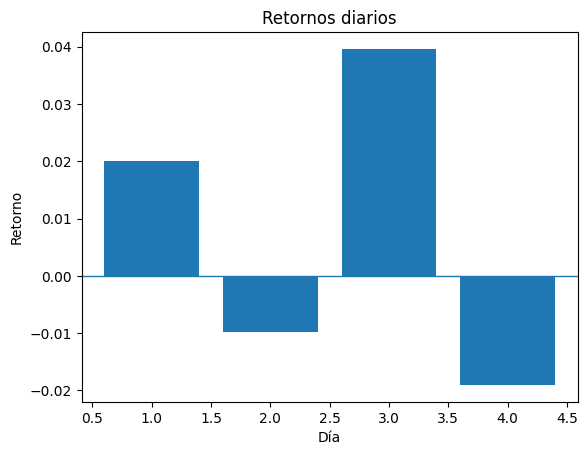

In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(range(1, len(retornos) + 1), retornos)
plt.axhline(0, linewidth=1)  # línea horizontal en 0 para separar ganancias/pérdidas
plt.title("Retornos diarios")
plt.xlabel("Día")
plt.ylabel("Retorno")
plt.show()

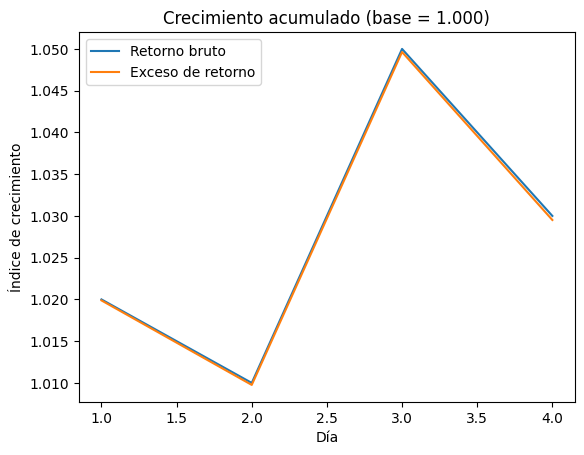

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Índices de crecimiento acumulado (base = 1)
cum_bruto = np.cumprod([1 + r for r in retornos])
cum_exceso = np.cumprod([1 + x for x in excesos])

plt.figure()
plt.plot(range(1, len(cum_bruto) + 1), cum_bruto, label="Retorno bruto")
plt.plot(range(1, len(cum_exceso) + 1), cum_exceso, label="Exceso de retorno")
plt.title("Crecimiento acumulado (base = 1.000)")
plt.xlabel("Día")
plt.ylabel("Índice de crecimiento")
plt.legend()
plt.show()

In [7]:
import yfinance as yf

# Download last 3 months of S&P500 (^GSPC is the ticker for S&P 500 index)
sp500 = yf.download("^GSPC", period="3mo")

# Inspect first rows
sp500.head()

C:\Users\adrip\AppData\Local\Temp\ipykernel_3748\2392448922.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", period="3mo")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2025-06-23,6025.169922,6028.770020,5943.229980,5969.669922,5597000000
2025-06-24,6092.180176,6101.759766,6059.250000,6061.209961,5443690000
2025-06-25,6092.160156,6108.509766,6080.089844,6104.229980,5171110000
2025-06-26,6141.020020,6146.520020,6107.270020,6112.089844,5308140000
2025-06-27,6173.069824,6187.680176,6132.350098,6150.700195,7889350000


In [8]:
import yfinance as yf

# Pedimos desde 3 meses atrás hasta hoy

start_date = "2025-06-22"   # fecha ~ 3 meses antes de 22/09/2025
end_date = "2025-09-22"

sp500 = yf.download("^GSPC", start=start_date, end=end_date, interval="1d")

sp500.head(), sp500.tail(), len(sp500)


C:\Users\adrip\AppData\Local\Temp\ipykernel_3748\1249719408.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start=start_date, end=end_date, interval="1d")
[*********************100%***********************]  1 of 1 completed


(Price             Close         High          Low         Open      Volume
 Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
 Date                                                                      
 2025-06-23  6025.169922  6028.770020  5943.229980  5969.669922  5597000000
 2025-06-24  6092.180176  6101.759766  6059.250000  6061.209961  5443690000
 2025-06-25  6092.160156  6108.509766  6080.089844  6104.229980  5171110000
 2025-06-26  6141.020020  6146.520020  6107.270020  6112.089844  5308140000
 2025-06-27  6173.069824  6187.680176  6132.350098  6150.700195  7889350000,
 Price             Close         High          Low         Open      Volume
 Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
 Date                                                                      
 2025-09-15  6615.279785  6619.620117  6602.069824  6603.490234  5045020000
 2025-09-16  6606.759766  6626.990234  6600.109863  6624.129883  5359510000
 2025-09-17

In [10]:
import yfinance as yf
import numpy as np

start_date = "2025-06-22"
end_date   = "2025-09-22"

# Descarga con ajuste automático: 'Close' ya viene ajustado
sp500 = yf.download("^GSPC", start=start_date, end=end_date, interval="1d",
                    auto_adjust=True, progress=False)

# Verificación rápida
print(sp500.head())
print(sp500.tail())
print("Cols:", list(sp500.columns))

# Serie de precios y retornos diarios
prices  = sp500["Close"]              # ya ajustado
returns = prices.pct_change().dropna()

print("n precios:", len(prices), " | n retornos:", len(returns))
returns.head()

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2025-06-23  6025.169922  6028.770020  5943.229980  5969.669922  5597000000
2025-06-24  6092.180176  6101.759766  6059.250000  6061.209961  5443690000
2025-06-25  6092.160156  6108.509766  6080.089844  6104.229980  5171110000
2025-06-26  6141.020020  6146.520020  6107.270020  6112.089844  5308140000
2025-06-27  6173.069824  6187.680176  6132.350098  6150.700195  7889350000
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2025-09-15  6615.279785  6619.620117  6602.069824  6603.490234  5045020000
2025-09-16  6606.759766  6626.990234  6600.109863  6624.129883  5359510000
2025-09-17  6600.350098  

Ticker,^GSPC
Date,
2025-06-24,0.011122
2025-06-25,-0.000003
2025-06-26,0.008020
2025-06-27,0.005219
2025-06-30,0.005164


In [11]:
import pandas as pd

mu = returns.mean()                 # daily mean
sigma = returns.std(ddof=1)         # daily stdev (sample)

mu, sigma, f"{mu:.3%}", f"{sigma:.3%}"


TypeError: unsupported format string passed to Series.__format__

In [12]:
# si returns es un DataFrame, cogemos solo la columna "Close"
if isinstance(returns, pd.DataFrame):
    returns = returns["Close"]

mu = returns.mean()                 # daily mean (float)
sigma = returns.std(ddof=1)         # daily stdev (float)

mu, sigma, f"{mu:.3%}", f"{sigma:.3%}"

KeyError: 'Close'

In [13]:
print(type(returns))
print(returns.head())
print(returns.columns if hasattr(returns, "columns") else "No tiene columnas")

<class 'pandas.core.frame.DataFrame'>
Ticker         ^GSPC
Date                
2025-06-24  0.011122
2025-06-25 -0.000003
2025-06-26  0.008020
2025-06-27  0.005219
2025-06-30  0.005164
Index(['^GSPC'], dtype='object', name='Ticker')


In [14]:
col = returns.columns[0]   # nombre real de la primera columna
returns = returns[col]

mu = returns.mean()
sigma = returns.std(ddof=1)

mu, sigma, f"{mu:.3%}", f"{sigma:.3%}"

(np.float64(0.0016429477309568672),
 np.float64(0.005591971798864768),
 '0.164%',
 '0.559%')

In [15]:
rf_annual = 0.03
rf_daily  = rf_annual / 252

# Excess returns
excess = returns - rf_daily

# Mean y volatility de excess
mu_x    = excess.mean()
sigma_x = excess.std(ddof=1)

# Sharpe ratios
sharpe_d = mu_x / sigma_x
sharpe_a = sharpe_d * (252 ** 0.5)

(mu_x, sigma_x, f"{mu_x:.3%}", f"{sigma_x:.3%}", sharpe_d, sharpe_a)

(np.float64(0.001523900111909248),
 np.float64(0.005591971798864767),
 '0.152%',
 '0.559%',
 np.float64(0.27251570049380736),
 np.float64(4.326052631203057))

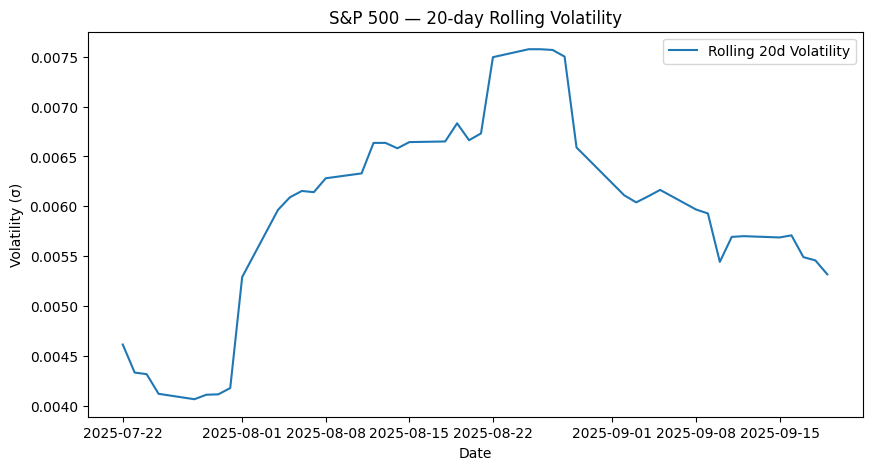

In [16]:
# Rolling volatility con ventana de 20 días
rolling_vol = returns.rolling(window=20).std(ddof=1)

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(rolling_vol, label="Rolling 20d Volatility")
plt.title("S&P 500 — 20-day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (σ)")
plt.legend()
plt.show()

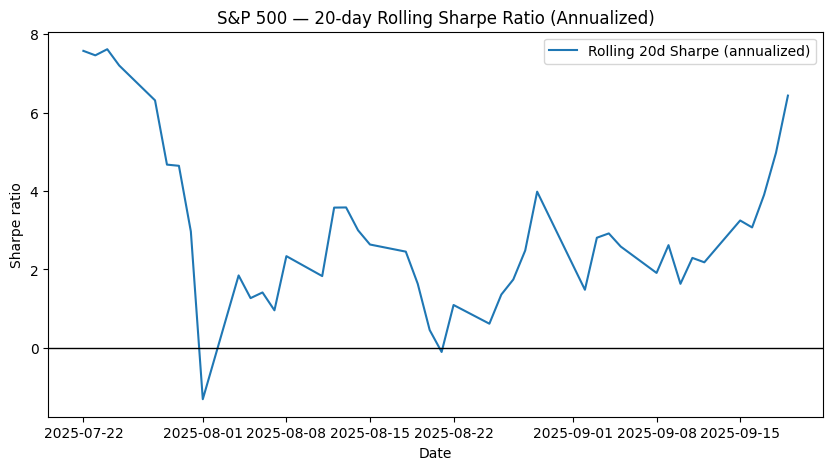

In [18]:
window = 20
rf_annual = 0.03
rf_daily = rf_annual / 252

# Excess returns
excess = returns - rf_daily

# Rolling mean y rolling volatility
rolling_mu = excess.rolling(window=window).mean()
rolling_sigma = excess.rolling(window=window).std(ddof=1)

# Rolling Sharpe diario y anualizado
rolling_sharpe_d = rolling_mu / rolling_sigma
rolling_sharpe_a = rolling_sharpe_d * (252 ** 0.5)

# Graficar
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(rolling_sharpe_a, label=f"Rolling {window}d Sharpe (annualized)")
plt.axhline(0, color="black", linewidth=1)
plt.title(f"S&P 500 — {window}-day Rolling Sharpe Ratio (Annualized)")
plt.xlabel("Date")
plt.ylabel("Sharpe ratio")
plt.legend()
plt.show()

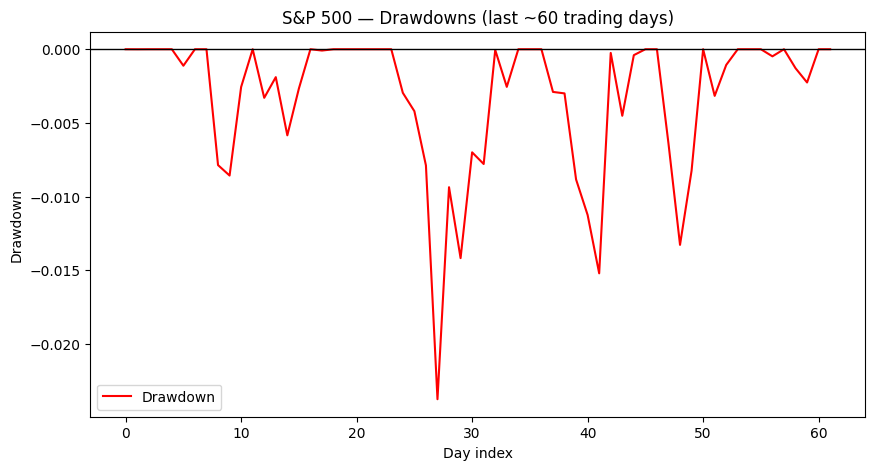

np.float64(-0.023750503295482138)

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Cumulative growth index
cumulative = np.cumprod(1 + returns.values)

# 2. Running maximum
running_max = np.maximum.accumulate(cumulative)

# 3. Drawdown series
drawdowns = (cumulative - running_max) / running_max

# 4. Plot
plt.figure(figsize=(10,5))
plt.plot(drawdowns, color="red", label="Drawdown")
plt.title("S&P 500 — Drawdowns (last ~60 trading days)")
plt.xlabel("Day index")
plt.ylabel("Drawdown")
plt.axhline(0, color="black", linewidth=1)
plt.legend()
plt.show()

# 5. Max drawdown value
max_dd = drawdowns.min()
max_dd

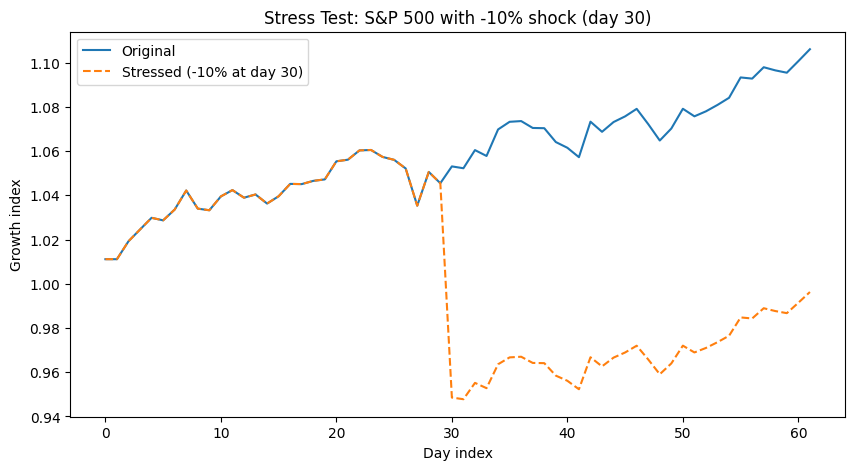

(np.float64(-0.023750503295482138), np.float64(-0.10629281864396474))

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Copiamos returns original
stress_returns = returns.copy()

# Elegimos día intermedio (día 30 aprox)
shock_day = stress_returns.index[30]

# Aplicamos un shock del -10%
stress_returns.loc[shock_day] += -0.10

# Cumulative original vs stressed
cum_original = np.cumprod(1 + returns.values)
cum_stressed = np.cumprod(1 + stress_returns.values)

plt.figure(figsize=(10,5))
plt.plot(cum_original, label="Original")
plt.plot(cum_stressed, label="Stressed (-10% at day 30)", linestyle="--")
plt.title("Stress Test: S&P 500 with -10% shock (day 30)")
plt.xlabel("Day index")
plt.ylabel("Growth index")
plt.legend()
plt.show()

# Función drawdown
def calc_drawdown(series):
    cumulative = np.cumprod(1 + series.values)
    running_max = np.maximum.accumulate(cumulative)
    drawdowns = (cumulative - running_max) / running_max
    return drawdowns.min()

dd_original = calc_drawdown(returns)
dd_stressed = calc_drawdown(stress_returns)

dd_original, dd_stressed

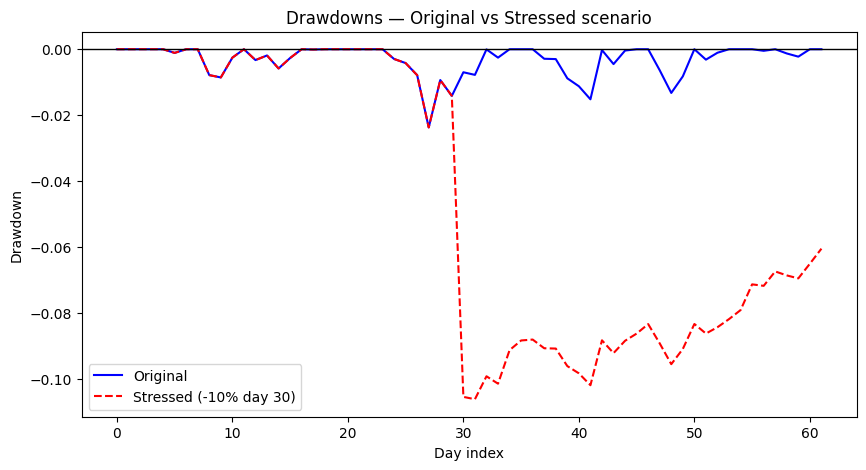

In [21]:
# Calcular drawdowns completos (no solo el max)
def calc_drawdown_series(series):
    cumulative = np.cumprod(1 + series.values)
    running_max = np.maximum.accumulate(cumulative)
    drawdowns = (cumulative - running_max) / running_max
    return drawdowns

dd_series_original = calc_drawdown_series(returns)
dd_series_stressed = calc_drawdown_series(stress_returns)

# Graficar
plt.figure(figsize=(10,5))
plt.plot(dd_series_original, label="Original", color="blue")
plt.plot(dd_series_stressed, label="Stressed (-10% day 30)", color="red", linestyle="--")
plt.axhline(0, color="black", linewidth=1)
plt.title("Drawdowns — Original vs Stressed scenario")
plt.xlabel("Day index")
plt.ylabel("Drawdown")
plt.legend()
plt.show()

In [28]:
import yfinance as yf
import pandas as pd

tickers = ["AAPL", "JPM", "XOM", "PG", "TSLA", "SPY"]

# Diccionario de precios ajustados
prices = {}
for t in tickers:
    prices[t] = yf.download(t, start="2025-03-01", end="2025-09-22")["Adj Close"]

# Combinar todo en un DataFrame
adj_close = pd.DataFrame(prices)

# Calcular retornos diarios
returns = adj_close.pct_change().dropna()

print(adj_close.head())
print(returns.head())

C:\Users\adrip\AppData\Local\Temp\ipykernel_3748\1755608756.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices[t] = yf.download(t, start="2025-03-01", end="2025-09-22")["Adj Close"]
[*********************100%***********************]  1 of 1 completed


KeyError: 'Adj Close'

In [29]:
import yfinance as yf
import pandas as pd

tickers = ["AAPL", "JPM", "XOM", "PG", "TSLA", "SPY"]

# Descargar precios ya ajustados (con auto_adjust=True por defecto)
data = yf.download(tickers, start="2025-03-01", end="2025-09-22")

# Usar "Close" porque ya está ajustado
adj_close = data["Close"]

# Calcular retornos diarios
returns = adj_close.pct_change().dropna()

print(adj_close.head())
print(returns.head())

C:\Users\adrip\AppData\Local\Temp\ipykernel_3748\1868290816.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2025-03-01", end="2025-09-22")
[*********************100%***********************]  6 of 6 completed

Ticker            AAPL         JPM          PG         SPY        TSLA  \
Date                                                                     
2025-03-03  237.448776  257.782623  173.317017  578.699219  284.649994   
2025-03-04  235.353912  247.525528  170.938202  571.849243  272.040009   
2025-03-05  235.164383  248.791580  172.349701  577.995361  279.100006   
2025-03-06  234.755386  243.855911  172.399063  567.735291  263.450012   
2025-03-07  238.486252  239.642288  173.672348  570.917358  262.670013   

Ticker             XOM  
Date                    
2025-03-03  105.792137  
2025-03-04  105.576149  
2025-03-05  103.514503  
2025-03-06  105.654694  
2025-03-07  107.029114  
Ticker          AAPL       JPM        PG       SPY      TSLA       XOM
Date                                                                  
2025-03-04 -0.008822 -0.039790 -0.013725 -0.011837 -0.044300 -0.002042
2025-03-05 -0.000805  0.005115  0.008257  0.010748  0.025952 -0.019528
2025-03-06 -0.001739 -

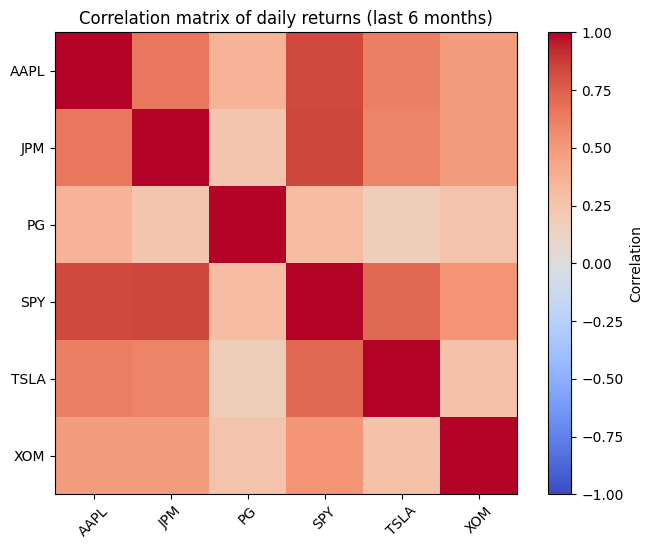

Ticker      AAPL       JPM        PG       SPY      TSLA       XOM
Ticker                                                            
AAPL    1.000000  0.654792  0.353871  0.832440  0.618921  0.479900
JPM     0.654792  1.000000  0.234774  0.840208  0.594346  0.479264
PG      0.353871  0.234774  1.000000  0.289813  0.172272  0.256532
SPY     0.832440  0.840208  0.289813  1.000000  0.711297  0.517952
TSLA    0.618921  0.594346  0.172272  0.711297  1.000000  0.269979
XOM     0.479900  0.479264  0.256532  0.517952  0.269979  1.000000


In [30]:
import matplotlib.pyplot as plt

# Matriz de correlaciones
corr_matrix = returns.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation matrix of daily returns (last 6 months)")
plt.show()

print(corr_matrix)

In [31]:
market = returns["SPY"]

betas = {}
for ticker in returns.columns:
    if ticker != "SPY":
        cov = np.cov(returns[ticker], market)[0][1]
        var_m = np.var(market)
        betas[ticker] = cov / var_m

print("Betas respecto a SPY:")
for t, b in betas.items():
    print(f"{t}: {b:.2f}")

Betas respecto a SPY:
AAPL: 1.38
JPM: 0.99
PG: 0.24
TSLA: 2.18
XOM: 0.58


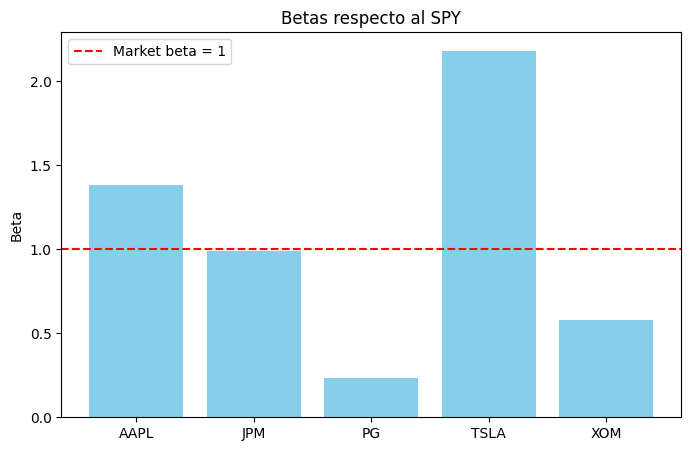

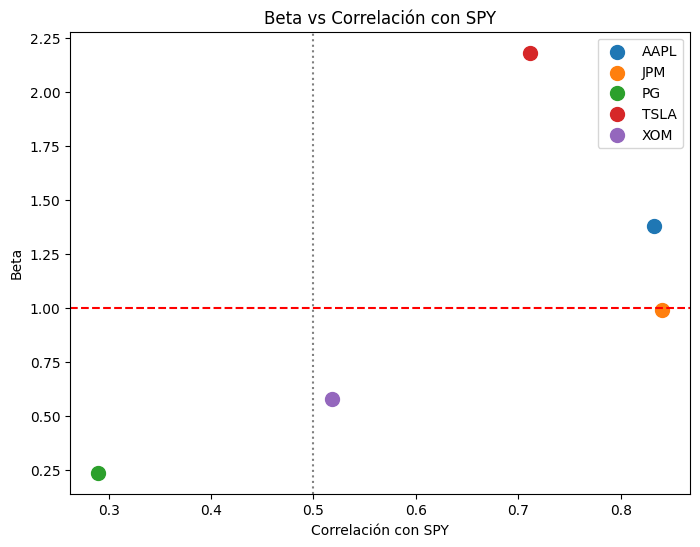

In [32]:
import matplotlib.pyplot as plt

# 1. Beta bar chart
plt.figure(figsize=(8,5))
plt.bar(betas.keys(), betas.values(), color="skyblue")
plt.axhline(1, color="red", linestyle="--", label="Market beta = 1")
plt.title("Betas respecto al SPY")
plt.ylabel("Beta")
plt.legend()
plt.show()

# 2. Scatter plot: beta vs correlación
correls = returns.corr()["SPY"].drop("SPY")  # correlaciones con el mercado

plt.figure(figsize=(8,6))
for t in betas.keys():
    plt.scatter(correls[t], betas[t], label=t, s=100)

plt.axhline(1, color="red", linestyle="--")
plt.axvline(0.5, color="grey", linestyle=":")  # referencia de correlación moderada
plt.title("Beta vs Correlación con SPY")
plt.xlabel("Correlación con SPY")
plt.ylabel("Beta")
plt.legend()
plt.show()

In [50]:
weights = {
    "AAPL": 0.30,
    "JPM": 0.15,
    "PG": 0.20,
    "XOM": 0.25,
    "TSLA": 0.10
}

In [51]:
tickers = list(weights.keys()) + ["SPY"]  # incluimos el mercado para comparar

data = yf.download(tickers, start="2022-01-01", end="2025-09-23")["Close"]
returns = data.pct_change().dropna()

C:\Users\adrip\AppData\Local\Temp\ipykernel_3748\3566259687.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2022-01-01", end="2025-09-23")["Close"]
[*********************100%***********************]  6 of 6 completed


In [52]:
# Convertir diccionario de pesos a vector
w = pd.Series(weights)

# Rentabilidad diaria de la cartera = combinación lineal de retornos
portfolio_returns = returns[w.index].dot(w)

# Acumulado (suponiendo 1000$ iniciales)
initial_investment = 1000
portfolio_value = (1 + portfolio_returns).cumprod() * initial_investment

# Acumulado del SPY (benchmark)
spy_value = (1 + returns["SPY"]).cumprod() * initial_investment

# Mostrar últimas cifras
print("Rentabilidad acumulada cartera:", portfolio_value[-1]/1000 - 1)
print("Rentabilidad acumulada SPY:", spy_value[-1]/1000 - 1)

Rentabilidad acumulada cartera: 0.6918574457664706
Rentabilidad acumulada SPY: 0.4713697857428172


C:\Users\adrip\AppData\Local\Temp\ipykernel_3748\3854136913.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Rentabilidad acumulada cartera:", portfolio_value[-1]/1000 - 1)
C:\Users\adrip\AppData\Local\Temp\ipykernel_3748\3854136913.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Rentabilidad acumulada SPY:", spy_value[-1]/1000 - 1)


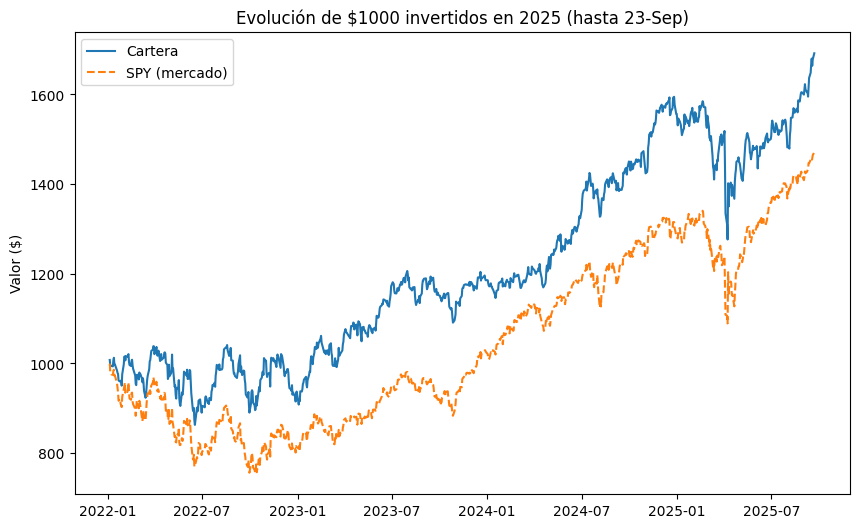

In [53]:
plt.figure(figsize=(10,6))
plt.plot(portfolio_value, label="Cartera")
plt.plot(spy_value, label="SPY (mercado)", linestyle="--")
plt.title("Evolución de $1000 invertidos en 2025 (hasta 23-Sep)")
plt.ylabel("Valor ($)")
plt.legend()
plt.show()

In [54]:
# Beta = Cov(cartera, mercado) / Var(mercado)
cov = np.cov(portfolio_returns, returns["SPY"])[0][1]
var_m = np.var(returns["SPY"])
beta_portfolio = cov / var_m

print("Beta de la cartera:", beta_portfolio)

Beta de la cartera: 0.8956116209710498
